# ***Extract reviews of any product from e-commerce websites like amazon & perform emotion mining.***

In [2]:
# Importing necessary libraries

import pandas as pd # Data processing
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Graphical Representation
%matplotlib inline
import seaborn as sns 

import string # Special operations for strings.
import spacy # Language models.

from nltk.corpus import stopwords # Stopwords in English language especially.

from wordcloud import WordCloud
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
}

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

**Look for web-tags in our soup, then append our data to reviewList**

In [5]:
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# Loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [54]:
# Save results to a dataframe.

data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data

,Rating,Title,Review,Review_Date
0,4.0,Feeling noise during in call by other person.,Everything is good but while attending call fr...,Reviewed in India 🇮🇳 on 1 December 2022
1,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,Reviewed in India 🇮🇳 on 23 November 2022
2,4.0,Phone pe shi se avaj nhi ati h aor shi se jati...,Song sunte time achi avaj ati h pr kabhi kabhi...,Reviewed in India 🇮🇳 on 2 December 2022
3,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,Reviewed in India 🇮🇳 on 26 November 2022
4,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,Reviewed in India 🇮🇳 on 26 November 2022
...,...,...,...,...
4995,3.0,Not sure for long use,Everything was good untill my right side pod s...,Reviewed in India 🇮🇳 on 19 November 2021
4996,2.0,Wastage of money,Buds are not charging from the box . And the b...,Reviewed in India 🇮🇳 on 4 April 2022
4997,2.0,Useless product,After Using one month from date of purchased ...,Reviewed in India 🇮🇳 on 16 February 2022
4998,4.0,Nice eardrums less p 1000 ka,Less p lo 1000 ka mila h is rate m nice,Reviewed in India 🇮🇳 on 2 September 2021


In [55]:
data=pd.read_csv('Amzon_boat.csv')
data.head(10)

,Rating,Title,Review,Review_Date
0,4.0,Feeling noise during in call by other person.,Everything is good but while attending call fr...,Reviewed in India 🇮🇳 on 1 December 2022
1,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,Reviewed in India 🇮🇳 on 23 November 2022
2,4.0,Phone pe shi se avaj nhi ati h aor shi se jati...,Song sunte time achi avaj ati h pr kabhi kabhi...,Reviewed in India 🇮🇳 on 2 December 2022
3,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,Reviewed in India 🇮🇳 on 26 November 2022
4,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,Reviewed in India 🇮🇳 on 26 November 2022
5,4.0,It was excellent,It was a good product of boat company and ther...,Reviewed in India 🇮🇳 on 26 November 2022
6,4.0,The left side bud is not working,The product is goodBut the left side bud is no...,Reviewed in India 🇮🇳 on 27 November 2022
7,4.0,Battery backup Kam ho gya h.1 year warranty me...,Battery backup Kam ho gya h return krne h.help me,Reviewed in India 🇮🇳 on 2 December 2022
8,4.0,Best earpods,It's been 1.5 months bought this product and i...,Reviewed in India 🇮🇳 on 27 November 2022
9,4.0,Size issue,Size is bigger so make 1 size smaller,Reviewed in India 🇮🇳 on 1 December 2022


In [9]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4830 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [11]:
data.Rating.describe()

count    5000.000000
mean        3.616600
std         1.196115
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [12]:
data.Review.isna().sum()

170

In [13]:
# For those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])


#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

    
data['Review_Date']= review_date[1:]

> **No. of words in each tweet**

In [14]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,4.0,Everything is good but while attending call fr...,41
1,4.0,Got it for 800 and the music quality is more t...,101
2,4.0,Song sunte time achi avaj ati h pr kabhi kabhi...,25
3,4.0,Good headphones to buy in this budget. Only th...,37
4,4.0,It has amazing design with stylish look. Sound...,36


> **Number of Stopwords.**

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,4.0,Everything is good but while attending call fr...,41,19
1,4.0,Got it for 800 and the music quality is more t...,101,39
2,4.0,Song sunte time achi avaj ati h pr kabhi kabhi...,25,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15
4,4.0,It has amazing design with stylish look. Sound...,36,12


> **Number of digits.**

In [17]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()


,Rating,Review,word_count,stopword_count,digits
0,4.0,Everything is good but while attending call fr...,41,19,0
1,4.0,Got it for 800 and the music quality is more t...,101,39,4
2,4.0,Song sunte time achi avaj ati h pr kabhi kabhi...,25,0,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15,0
4,4.0,It has amazing design with stylish look. Sound...,36,12,0


> **Number of URLs**

In [18]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()


,Rating,Review,word_count,stopword_count,digits,web_links
0,4.0,Everything is good but while attending call fr...,41,19,0,0
1,4.0,Got it for 800 and the music quality is more t...,101,39,4,0
2,4.0,Song sunte time achi avaj ati h pr kabhi kabhi...,25,0,0,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15,0,0
4,4.0,It has amazing design with stylish look. Sound...,36,12,0,0


> **Number of weblinks.**

In [19]:
data.web_links.value_counts()
#no weblinks

0    5000
Name: web_links, dtype: int64

> **Number of Hashtags.**

In [20]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()


,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,4.0,Everything is good but while attending call fr...,41,19,0,0,0
1,4.0,Got it for 800 and the music quality is more t...,101,39,4,0,0
2,4.0,Song sunte time achi avaj ati h pr kabhi kabhi...,25,0,0,0,0
3,4.0,Good headphones to buy in this budget. Only th...,37,15,0,0,0
4,4.0,It has amazing design with stylish look. Sound...,36,12,0,0,0


In [21]:
data.hashtag.value_counts()
# 4 hashtags

0    4997
1       3
Name: hashtag, dtype: int64

> **Feature Engineering**

In [22]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 
data['Month'] = data['Review_Date'].str.split(' ').str[1] 
data['Year'] = data['Review_Date'].str.split(' ').str[2] 
data[['Review_Date', 'date', 'Month', 'Year']]

,Review_Date,date,Month,Year
0,1 December 2022,1,December,2022
1,23 November 2022,23,November,2022
2,2 December 2022,2,December,2022
3,26 November 2022,26,November,2022
4,26 November 2022,26,November,2022
...,...,...,...,...
4995,19 November 2021,19,November,2021
4996,4 April 2022,4,April,2022
4997,16 February 2022,16,February,2022
4998,2 September 2021,2,September,2021


In [23]:
# Keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1

,Rating,Title,Review,date,Month,Year
0,4.0,Feeling noise during in call by other person.,Everything is good but while attending call fr...,1,December,2022
1,4.0,Great sound bad mic,Got it for 800 and the music quality is more t...,23,November,2022
2,4.0,Phone pe shi se avaj nhi ati h aor shi se jati...,Song sunte time achi avaj ati h pr kabhi kabhi...,2,December,2022
3,4.0,Good headphones to buy in this budget,Good headphones to buy in this budget. Only th...,26,November,2022
4,4.0,Good sound quality.,It has amazing design with stylish look. Sound...,26,November,2022
...,...,...,...,...,...,...
4995,3.0,Not sure for long use,Everything was good untill my right side pod s...,19,November,2021
4996,2.0,Wastage of money,Buds are not charging from the box . And the b...,4,April,2022
4997,2.0,Useless product,After Using one month from date of purchased ...,16,February,2022
4998,4.0,Nice eardrums less p 1000 ka,Less p lo 1000 ka mila h is rate m nice,2,September,2021


# ***Data Visualization***

> **Reviews by Year**

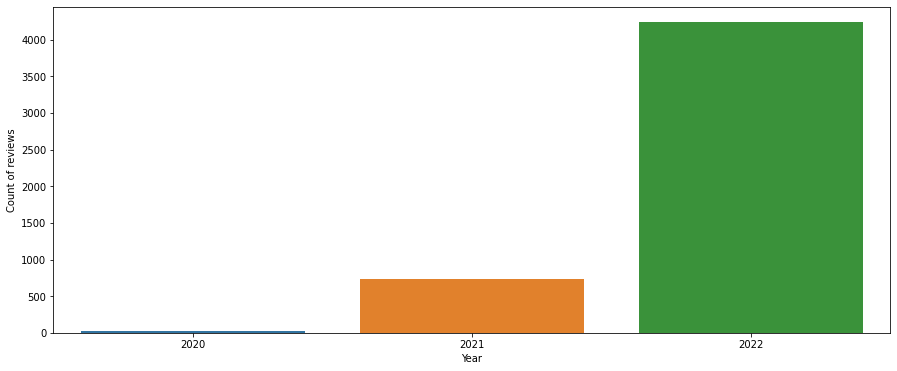

In [24]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data1.Year, order=['2020','2021','2022'] ) 
plt.xlabel('Year')
plt.ylabel('Count of reviews')
plt.show()

>>**We can see that most of the reviews were recieved in the year 2022 we close to 4500.**

> **Reviews by Month-Year**

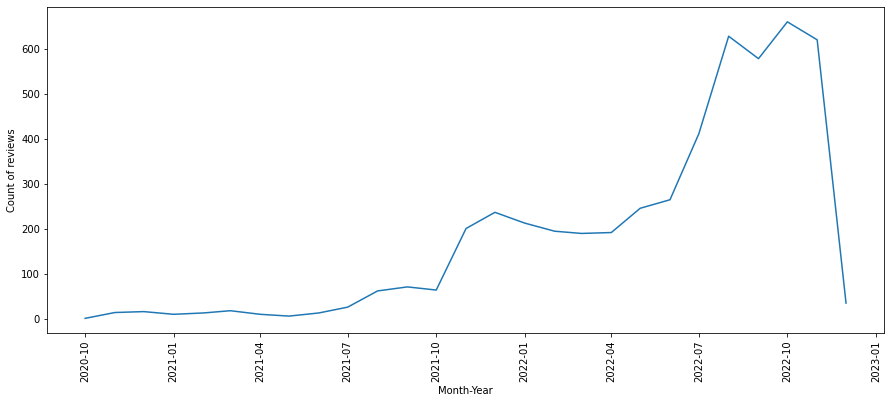

In [25]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

>> **Most of the reviews were recieved during the months of July and October in the year 2022. On a particular day of the month the views peaked close to 650.**

> **Reviews by Stars**

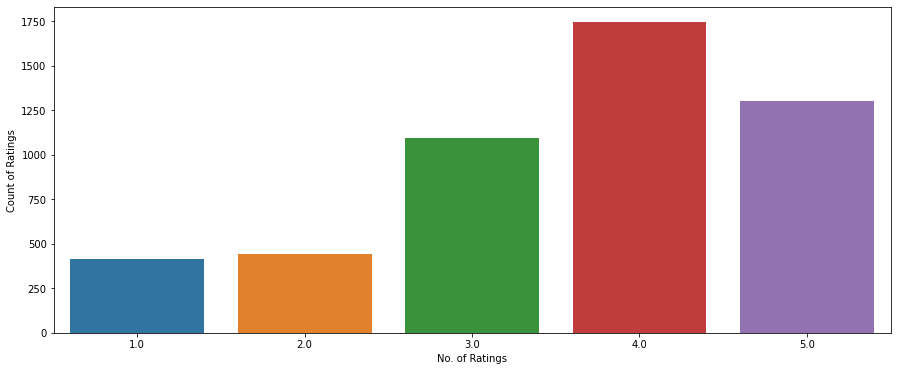

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating) 
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

>> **From the above countplot we can conclude that most of the ratings were 4.**

# ***Text Processing***

In [59]:
# Keeping features which are important for time being.

data2 = data1[['Review']] 
data2

,Review
0,Everything is good but while attending call fr...
1,Got it for 800 and the music quality is more t...
2,Song sunte time achi avaj ati h pr kabhi kabhi...
3,Good headphones to buy in this budget. Only th...
4,It has amazing design with stylish look. Sound...
...,...
4995,Everything was good untill my right side pod s...
4996,Buds are not charging from the box . And the b...
4997,After Using one month from date of purchased ...
4998,Less p lo 1000 ka mila h is rate m nice


>> **Removing punctuations, digits, emoticons and normalizing the reviews.**

In [60]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [61]:
corpus

['everything is good but while attending call from this airbuds other person got noisy sound from my side side this is big problem and im also not able to use this during on call what should i do in this condition',
 'got it for  and the music quality is more than worth it has been working great for more than  months now surprisingly great battery life buds run upto  hours or more without charge and charge within  minutes the case can completely charge the buds  times the case takes  mins to charge completelymic quality is very poor though might just be a defect on my piece the things we say are feeble to the listener and the background noise is more prominent in the mic than our words yet again might just be my pieces defect',
 'song sunte time achi avaj ati h pr kabhi kabhi saund shi nhi ata ruk ruk jata h aor kabhi kabhi discount ho jata h',
 'good headphones to buy in this budget only thing that i dont like is the micro usb port to charge the headphones these days type c port are c

In [62]:
data2['clean_reviews'] = corpus 
data2

,Review,clean_reviews
0,Everything is good but while attending call fr...,everything is good but while attending call fr...
1,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...
2,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...
4,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...
...,...,...
4995,Everything was good untill my right side pod s...,everything was good untill my right side pod s...
4996,Buds are not charging from the box . And the b...,buds are not charging from the box and the bo...
4997,After Using one month from date of purchased ...,after using one month from date of purchased ...
4998,Less p lo 1000 ka mila h is rate m nice,less p lo ka mila h is rate m nice


> # **Removing stopwords**

In [31]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
1,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
2,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
4,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
5,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
6,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...
7,Battery backup Kam ho gya h return krne h.help me,battery backup kam ho gya h return krne hhelp me,battery backup kam ho gya h return krne hhelp
8,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,months bought product one best boat earpod
9,Size is bigger so make 1 size smaller,size is bigger so make size smaller,size bigger make size smaller


>>**Tokenisation**

In [32]:
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [everything, good, attending, call, airbuds, p...
1    [got, music, quality, worth, working, great, m...
2    [song, sunte, time, achi, avaj, ati, h, pr, ka...
3    [good, headphones, buy, budget, thing, dont, l...
4    [amazing, design, stylish, look, sound, qualit...
5    [good, product, boat, company, clearlty, sound...
6    [product, goodbut, left, side, bud, workingi, ...
7    [battery, backup, kam, ho, gya, h, return, krn...
8    [months, bought, product, one, best, boat, ear...
9                  [size, bigger, make, size, smaller]
Name: absolute_clean_reviews, dtype: object

>> **Lemmatisation**

In [33]:
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [everything, good, attending, call, airbuds, p...
1    [got, music, quality, worth, working, great, m...
2    [song, sunte, time, achi, avaj, ati, h, pr, ka...
3    [good, headphone, buy, budget, thing, dont, li...
4    [amazing, design, stylish, look, sound, qualit...
5    [good, product, boat, company, clearlty, sound...
6    [product, goodbut, left, side, bud, workingi, ...
7    [battery, backup, kam, ho, gya, h, return, krn...
8    [month, bought, product, one, best, boat, earpod]
9                  [size, bigger, make, size, smaller]
Name: absolute_clean_reviews, dtype: object

> **Joining tokens into sentence**

In [34]:
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
1,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great month su...
2,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphone buy budget thing dont like micr...
4,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
5,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
6,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...
7,Battery backup Kam ho gya h return krne h.help me,battery backup kam ho gya h return krne hhelp me,battery backup kam ho gya h return krne hhelp
8,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,month bought product one best boat earpod
9,Size is bigger so make 1 size smaller,size is bigger so make size smaller,size bigger make size smaller


# ***Basic Feature Extraction***
> **Bag of words**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  
print(vectorizer.vocabulary_)


{'everything': 1732, 'good': 2090, 'attending': 327, 'call': 759, 'airbuds': 130, 'person': 3622, 'got': 2153, 'noisy': 3318, 'sound': 4655, 'side': 4532, 'big': 578, 'problem': 3836, 'im': 2403, 'also': 176, 'able': 22, 'use': 5234, 'condition': 1114, 'music': 3227, 'quality': 3996, 'worth': 5541, 'working': 5505, 'great': 2161, 'month': 3162, 'surprisingly': 4852, 'battery': 472, 'life': 2816, 'bud': 696, 'run': 4344, 'upto': 5221, 'hour': 2358, 'without': 5485, 'charge': 916, 'within': 5484, 'minute': 3111, 'case': 856, 'completely': 1096, 'time': 5033, 'take': 4882, 'min': 3101, 'completelymic': 1097, 'poor': 3733, 'though': 5012, 'might': 3088, 'defect': 1318, 'piece': 3666, 'thing': 4982, 'say': 4399, 'feeble': 1856, 'listener': 2849, 'background': 394, 'noise': 3312, 'prominent': 3926, 'mic': 3073, 'word': 5501, 'yet': 5586, 'song': 4637, 'sunte': 4814, 'achi': 58, 'avaj': 354, 'ati': 311, 'pr': 3781, 'kabhi': 2667, 'saund': 4394, 'shi': 4502, 'nhi': 3282, 'ata': 307, 'ruk': 434

> **Removing some more stopwords.**

In [63]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya'] 

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
1,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great months s...
2,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphones buy budget thing dont like mic...
4,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
5,It was a good product of boat company and ther...,it was a good product of boat company and ther...,good product boat company clearlty sound bass ...
6,The product is goodBut the left side bud is no...,the product is goodbut the left side bud is no...,product goodbut left side bud workingi brought...
7,Battery backup Kam ho gya h return krne h.help me,battery backup kam ho gya h return krne hhelp me,battery backup kam ho gya h return krne hhelp
8,It's been 1.5 months bought this product and i...,its been months bought this product and its o...,months bought product one best boat earpod
9,Size is bigger so make 1 size smaller,size is bigger so make size smaller,size bigger make size smaller


> **Let's see how many bi-grams and tri-grams can be induced here.**

In [36]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df

,aa,aage,aap,aati,aavaj,ab,able,able connect,able hear,able hear clearly,...,बहत,बहत अचछ,मझ,रह,लए,वल,सउड,सकत,सह,हत
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> **TF-IDF**

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names())
count_df_tf_idf

,aa,aage,aap,aati,aavaj,ab,able,able connect,able hear,able hear clearly,...,रह,लए,वल,सउड,सकत,सफ,सफ नह,सह,सह नह,हत
0,0.0,0.0,0.0,0.0,0.0,0.0,0.178882,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data2

,Review,clean_reviews,absolute_clean_reviews
0,Everything is good but while attending call fr...,everything is good but while attending call fr...,everything good attending call airbuds person ...
1,Got it for 800 and the music quality is more t...,got it for and the music quality is more than...,got music quality worth working great month su...
2,Song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...,song sunte time achi avaj ati h pr kabhi kabhi...
3,Good headphones to buy in this budget. Only th...,good headphones to buy in this budget only thi...,good headphone buy budget thing dont like micr...
4,It has amazing design with stylish look. Sound...,it has amazing design with stylish look sound ...,amazing design stylish look sound quality good...
...,...,...,...
4995,Everything was good untill my right side pod s...,everything was good untill my right side pod s...,everything good untill right side pod stopped ...
4996,Buds are not charging from the box . And the b...,buds are not charging from the box and the bo...,bud charging box boat centered receiving call ...
4997,After Using one month from date of purchased ...,after using one month from date of purchased ...,using one month date purchased become faulty o...
4998,Less p lo 1000 ka mila h is rate m nice,less p lo ka mila h is rate m nice,le p lo ka mila h rate nice


In [41]:
from google.colab import files
uploaded=files.upload()

Saving affin.csv to affin.csv


In [67]:
afinn = pd.read_csv('affin.csv',encoding='latin') 
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']]

,absolute_clean_reviews,sentiment_value
0,everything good attending call airbuds person ...,-1
1,got music quality worth working great months s...,-1
2,song sunte time achi avaj ati h pr kabhi kabhi...,0
3,good headphones buy budget thing dont like mic...,3
4,amazing design stylish look sound quality good...,6
...,...,...
4995,everything good untill right side pod stopped ...,2
4996,buds charging box boat centered receiving call...,0
4997,using one month date purchased become faulty o...,-2
4998,less p lo ka mila h rate nice,1


In [68]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]

,absolute_clean_reviews,sentiment_value,sentiment
0,everything good attending call airbuds person ...,-1,Negative
1,got music quality worth working great months s...,-1,Negative
2,song sunte time achi avaj ati h pr kabhi kabhi...,0,Neutral
3,good headphones buy budget thing dont like mic...,3,Positive
4,amazing design stylish look sound quality good...,6,Positive
...,...,...,...
4995,everything good untill right side pod stopped ...,2,Positive
4996,buds charging box boat centered receiving call...,0,Neutral
4997,using one month date purchased become faulty o...,-2,Negative
4998,less p lo ka mila h rate nice,1,Positive


In [69]:
data2.sentiment.value_counts()

Positive    3110
Neutral     1183
Negative     707
Name: sentiment, dtype: int64

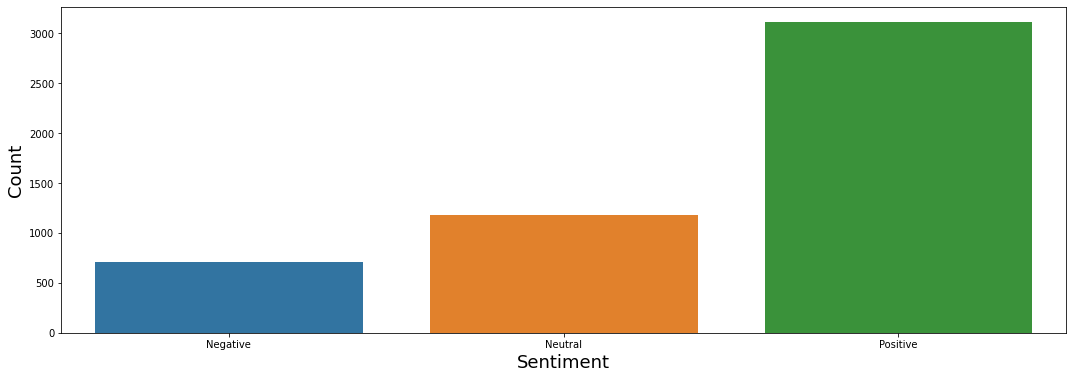

In [77]:
plt.figure(figsize=(18,6))
sns.countplot(data2.sentiment);
plt.xlabel('Sentiment',fontsize=18)
plt.ylabel('Count',fontsize=18);

>> **We can see that there are more positive reviews about the product.**

> # ***Wordcloud for Positive words***

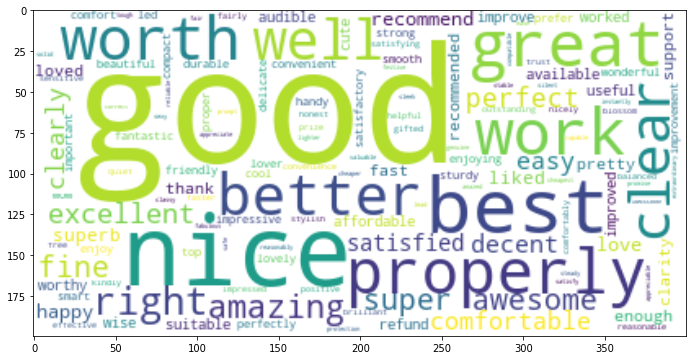

In [50]:
positive = []
negative = []
neutral = [] 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  
pos =' '.join(positive) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')


> # ***Word cloud for Negative words***

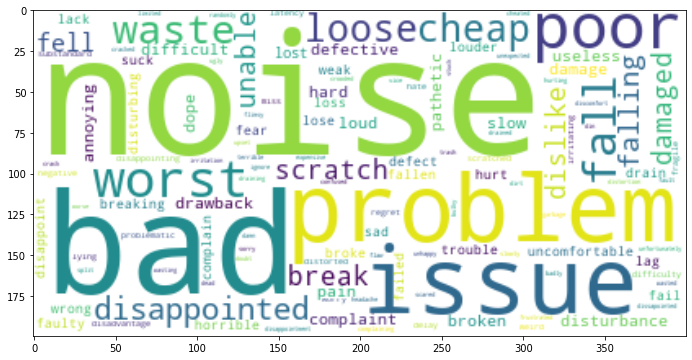

In [51]:
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

> # ***Wordcloud for All words***

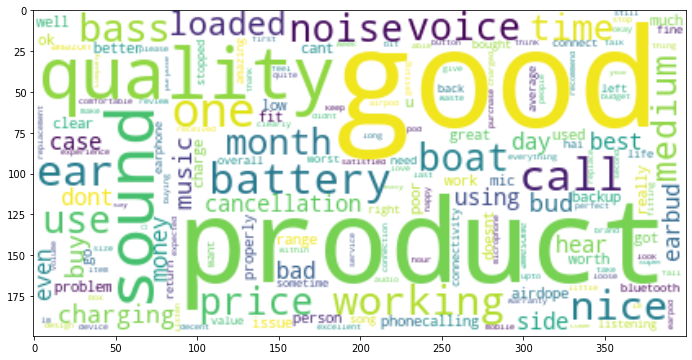

In [52]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear')